<a href="https://colab.research.google.com/github/quoctrungsz27/week9_AI/blob/main/week9_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10 
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


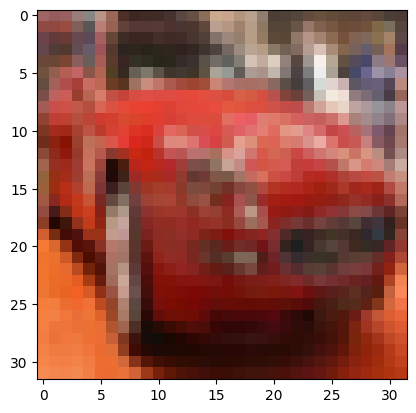

So : [2]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
digit = x_train[5]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print("So :",y_train[5])

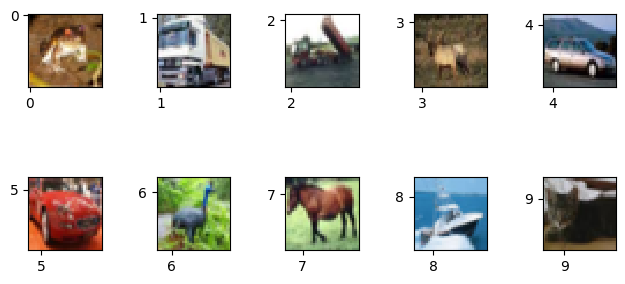

In [ ]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap = 'gray',interpolation='none')
  plt.xticks([i])
  plt.yticks([i])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3000,activation = 'relu',input_shape = (32*32*3,)))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(500,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_5 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = x_test
y = y_test

x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=1, batch_size =128)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát trên tập kiểm tra; ',test_loss)
print('Độ chính xác trên tập kiểm tra: ',test_acc)

313/313 [==============================] - 10s 32ms/step - loss: 1.8075 - accuracy: 0.3576
Mất mát trên tập kiểm tra;  1.8075224161148071
Độ chính xác trên tập kiểm tra:  0.35760000348091125


In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.save('test.h5') #lưu file đã train 

In [ ]:
from keras.models import load_model
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras

#load lại modelmodel đã train
new_model = tf.keras.models.load_model('/content/test.h5')

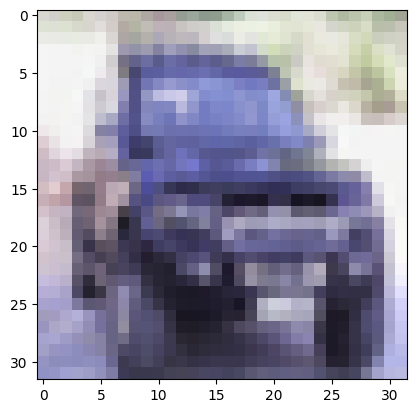

So : [1]


In [ ]:
v1 = x[9]
plt.imshow(v1,cmap = plt.cm.binary)
plt.show()
print("So :",y[9])

In [ ]:
x_pred =x[9].reshape(1,32*32*3)

x_pred = x_pred.astype('float32')/255
                                        #kiểm tra  xem đúng khôngkhông
y_pred = model.predict(x_pred)
#print(y_pred)


1/1 [==============================] - 0s 29ms/step


In [ ]:
import numpy as np

np.argmax(model.predict(x_pred),axis = 1)

1/1 [==============================] - 0s 26ms/step


array([8])